In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/IOT_Assign

/content/drive/MyDrive/IOT_Assign


In [ ]:
import os
import glob

current_path = '/content/drive/MyDrive/IOT_Assign/'
resized_path = os.path.join(current_path, 'resized_data')
files = glob.glob(os.path.join(current_path, 'data/*'))
print(files)

for i, file in enumerate(files):
    print(str(i),file)
    os.system("ffmpeg -ss 00:00:00 -i %s -t 00:00:21 -c copy %s.mp4" %
             (file, os.path.join(resized_path, str(i))))

['/content/drive/MyDrive/IOT_Assign/data/VID_20210319_114430_1.mp4', '/content/drive/MyDrive/IOT_Assign/data/VID_20210319_114606_2.mp4', '/content/drive/MyDrive/IOT_Assign/data/VID_20210319_114915_3.mp4', '/content/drive/MyDrive/IOT_Assign/data/VID_20210319_115506_4.mp4', '/content/drive/MyDrive/IOT_Assign/data/VID_20210319_115621_5.mp4', '/content/drive/MyDrive/IOT_Assign/data/VID_20210319_115921_6.mp4', '/content/drive/MyDrive/IOT_Assign/data/VID_20210319_120027_7.mp4', '/content/drive/MyDrive/IOT_Assign/data/VID_20210319_120505_8.mp4', '/content/drive/MyDrive/IOT_Assign/data/VID_20210319_120535_9.mp4', '/content/drive/MyDrive/IOT_Assign/data/VID_20210319_120606_10.mp4', '/content/drive/MyDrive/IOT_Assign/data/VID_20210319_120829_11.mp4', '/content/drive/MyDrive/IOT_Assign/data/VID_20210319_120941_12.mp4', '/content/drive/MyDrive/IOT_Assign/data/WhatsApp Image 2021-03-19 at 12.35.00 PM.jpeg']
0 /content/drive/MyDrive/IOT_Assign/data/VID_20210319_114430_1.mp4
1 /content/drive/MyDrive/

In [ ]:
!pip install sk-video

     |████████████████████████████████| 2.3MB 4.9MB/s 


In [ ]:
def plot_graph_BIP(y,title):
  
  x = np.arange(len(y)) 
  x_new = np.linspace(0, len(y), 10*len(y))
  a_BSpline = make_interp_spline(x, y)
  y_new = a_BSpline(x_new)

  plt.plot(x_new, y_new) 
  plt.xlabel('frames') 
  plt.ylabel('mean') 
  plt.title(title) 
  plt.show() 

def plot_graph(y,title):
  x = np.arange(len(y))  
  plt.plot(x, y) 
  plt.xlabel('frames') 
  plt.ylabel('mean') 
  plt.title(title) 
  #plt.show() 

def plot_fft_graph(y,title):
  x = np.arange(len(y)) 
  y_fft = np.fft.fft(y)
  print("max_red_fft==",max(y))
  freq = np.fft.fftfreq(x.shape[-1])
  #a_BSpline = scipy.interpolate.make_interp_spline(x, y)
  #y = a_BSpline(x)
  plt.plot(y_fft,y) 
  plt.xlabel('frames') 
  plt.ylabel('mean') 
  plt.title(title)
  plt.show() 
  

In [ ]:
import numpy as np
def moving_average(a) :
    n=12
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [212]:
import skvideo.io
import numpy as np
import os
import glob
from scipy.interpolate import make_interp_spline

# importing the required module 
import matplotlib.pyplot as plt 
current_path = '/content/drive/MyDrive/IOT_Assign'
resized_path = os.path.join(current_path, 'crop_edge_data1')
files = glob.glob(resized_path+'/*')

print(len(files))
i=0
red_mean=[]
for file in files:
  if i==0:
    video = skvideo.io.vread(file)
    print(video.shape, type(video))
    video = video.reshape(len(video),-1,3) #(f,l,w,c)(1261, 1080, 1920, 3)---> (f,l*w,c)
    print(video.shape) 

    red_mean = np.mean(video[:,:,0], axis = 1) 
    #green_mean = np.mean(video[:,:,1], axis = 1)
    #blue_mean = np.mean(video[:,:,2], axis = 1)
    del(video)

    new_mean = moving_average(red_mean)
    plot_graph(new_mean[:300],"%d new_red_graph" %(i))
    plot_graph(red_mean[:300],"%d red_graph" %(i))
    #plot_graph_BIP(red_mean[:300],"%d red_graph" %(i))
    #plot_fft_graph(red_mean,"%d red_graph fft" %(i))
    #dikh rha h?
  i=i+1



8


ValueError: ignored

In [ ]:
import pandas as pd
import math
hrw = 60
fs = .40
dataset = pd.DataFrame(new_mean, columns = ['hart']) 
mov_avg = dataset['hart'].rolling(35).mean()
avg_hr = (np.mean(dataset.hart))
mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
#mov_avg = [x*1.2 for x in mov_avg]
dataset['hart_rollingmean'] = mov_avg

In [ ]:
measures = {}
window = []
peaklist = []
listpos = 0
for datapoint in dataset.hart:
    #print(datapoint, dataset['hart_rollingmean'][listpos])
    rollingmean = dataset.hart_rollingmean[listpos]
    if (datapoint < rollingmean) and (len(window) < 1):
        #print("no")
        listpos += 1
    elif (datapoint > rollingmean):
        window.append(datapoint)
        listpos += 1
    else:
        #print(window)
        maximum = max(window)
        beatposition = listpos - len(window) + (window.index(max(window)))
        peaklist.append(beatposition)
        window = []
        listpos += 1
measures['peaklist'] = peaklist
measures['ybeat'] = [dataset.hart[x] for x in peaklist]
print(peaklist)
#print(dataset['hart_rollingmean'])

[78, 117, 137, 148, 157, 168, 188, 198]


In [ ]:
peaklist = measures['peaklist']
measures['bpm'] = len(peaklist)*3
print(measures['bpm'])

24


In [ ]:
def plotter(dataset, title):
    peaklist = measures['peaklist']
    ybeat = measures['ybeat']
    plt.title(title)
    plt.plot(dataset.hart, alpha=0.5, color='blue', label="raw signal")
    #.plot(dataset.hart_rollingmean, color ='green', label="moving average")
    plt.scatter(peaklist, ybeat, color='red', label="average: %.1f BPM" %measures['bpm'])
    plt.legend(loc=4, framealpha=0.6)
    plt.show()

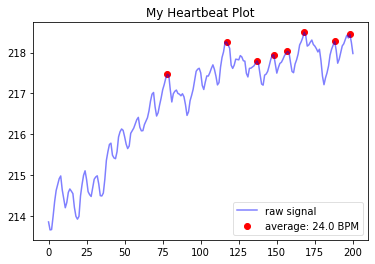

In [ ]:
plotter(dataset, "My Heartbeat Plot")

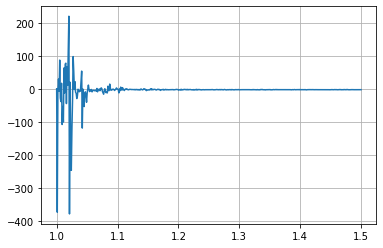

In [ ]:
from scipy.fft import fft, fftfreq
from statistics import mean 

# Number of sample points
N = 1261
# sample spacing
T = 1.0 / 60.0
x = np.linspace(1, 1.5, 500)
y = new_mean2
y= y- mean(y)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(x, yf[:500].real)
plt.grid()
plt.show()